# Classificação de Imagens

Vamos usar o [MNIST handwritten digits dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset)

* Vamos cirar uma rede neural para classificar imagens!

* Use the [Keras API](https://keras.io/) to load the MNIST dataset and prepare it for training
* Treinar uma MLP e aplicá-la no MNIST dataset
* Avaliar a peformance do modelo

## MNIST

Uma coleção de 70.000 imagens em escala de cinza de dígitos manuscritos de 0 a 9 foi um grande avanço. Hoje esse já é um problema trivial!

![picture](https://drive.google.com/uc?id=1PzAr3emcnpuV6kkXXUshpMWkEnOtvW0D)

## Carregando a base

In [33]:
from tensorflow.keras.datasets import mnist

In [34]:
# split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

Podemos ver que o Keras particionou 60.000 dessas imagens para treinamento e 10.000 para validação (após o treinamento). Além disso, cada imagem em si é um array 2D com as dimensões 28x28:

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_valid.shape

(10000, 28, 28)

As imagens de 28x28 são representadas como uma coleção de valores inteiros que variam entre 0 e 255. Esses valores correspondem ao valor de cinza de um pixel, onde 0 é preto, 255 é branco, e todos os outros valores estão entre esses extremos:

In [37]:
x_train.min()

0

In [38]:
x_train.max()

255

In [39]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Usando o [Matplotlib](https://matplotlib.org/), conseguimos exibir as imagens do nosso dataset:

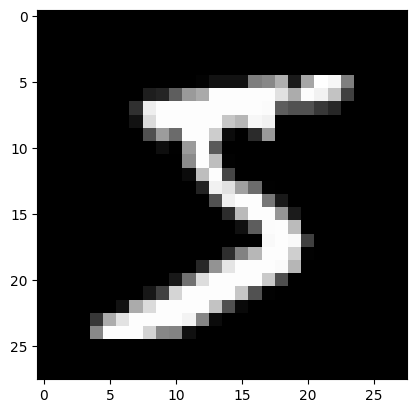

In [40]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Dessa forma, agora podemos ver que esta é uma imagem de 28x28 pixels de um 5. Ou será que é um 3? A resposta está nos dados de y_train, que contêm os rótulos corretos para os dados. Vamos dar uma olhada:

In [41]:
y_train[0]

5

## Preparando dados para treino

1. Achatar os dados da imagem, para simplificar a entrada da imagem no modelo.
2. Normalizar os dados da imagem, para tornar os valores da imagem mais fáceis de trabalhar para o modelo.
3. Categorizar os rótulos, para tornar os valores dos rótulos mais fáceis de trabalhar para o modelo.

### Flattening

Converter cada imagem 28x28 em um vetor unidimensional de 784 pixels (28 * 28)

In [42]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [43]:
x_train.shape

(60000, 784)

In [44]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizar

MLP funciona melhor com valores normalizados. Nesse caso, a normalização dos dados é feita dividindo os valores dos pixels por 255:

In [45]:
x_train = x_train / 255
x_valid = x_valid / 255

In [46]:
x_train.min()

0.0

In [47]:
x_train.max()

1.0

### Categorical Encoding

In [48]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [49]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Instanciando o Modelo

In [50]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

model = Sequential()

In [51]:
# Input
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

# Hidden Layer
model.add(Dense(units = 512, activation='relu'))
# Output Layer
model.add(Dense(units = 10, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

In [53]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### Treinando o modelo

In [54]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9024 - loss: 0.3163 - val_accuracy: 0.9691 - val_loss: 0.1053
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9744 - loss: 0.0884 - val_accuracy: 0.9785 - val_loss: 0.0806
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9819 - loss: 0.0612 - val_accuracy: 0.9763 - val_loss: 0.0945
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0462 - val_accuracy: 0.9792 - val_loss: 0.0929
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9906 - loss: 0.0359 - val_accuracy: 0.9816 - val_loss: 0.0854


### Observando a acurácia

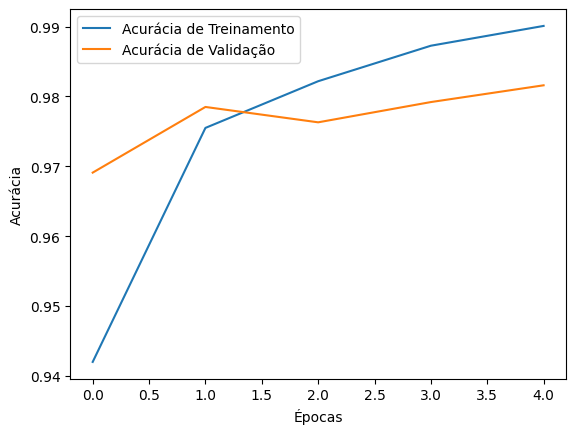

In [55]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Acurácia de Treinamento')
plt.plot(val_accuracy, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()